# Quick Investigation on Data

In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read data
data_set = pd.read_csv("data/Challenger_Ranked_Games.csv")
data_set.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [3]:
#About data
data_set.describe()
data_set.shape
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
gameId                     26904 non-null int64
gameDuraton                26904 non-null int64
blueWins                   26904 non-null int64
blueFirstBlood             26904 non-null int64
blueFirstTower             26904 non-null int64
blueFirstBaron             26904 non-null int64
blueFirstDragon            26904 non-null int64
blueFirstInhibitor         26904 non-null int64
blueDragonKills            26904 non-null int64
blueBaronKills             26904 non-null int64
blueTowerKills             26904 non-null int64
blueInhibitorKills         26904 non-null int64
blueWardPlaced             26904 non-null int64
blueWardkills              26904 non-null int64
blueKills                  26904 non-null int64
blueDeath                  26904 non-null int64
blueAssist                 26904 non-null int64
blueChampionDamageDealt    26904 non-null int64
blueTotalGold              

#  Co-relation Matrix

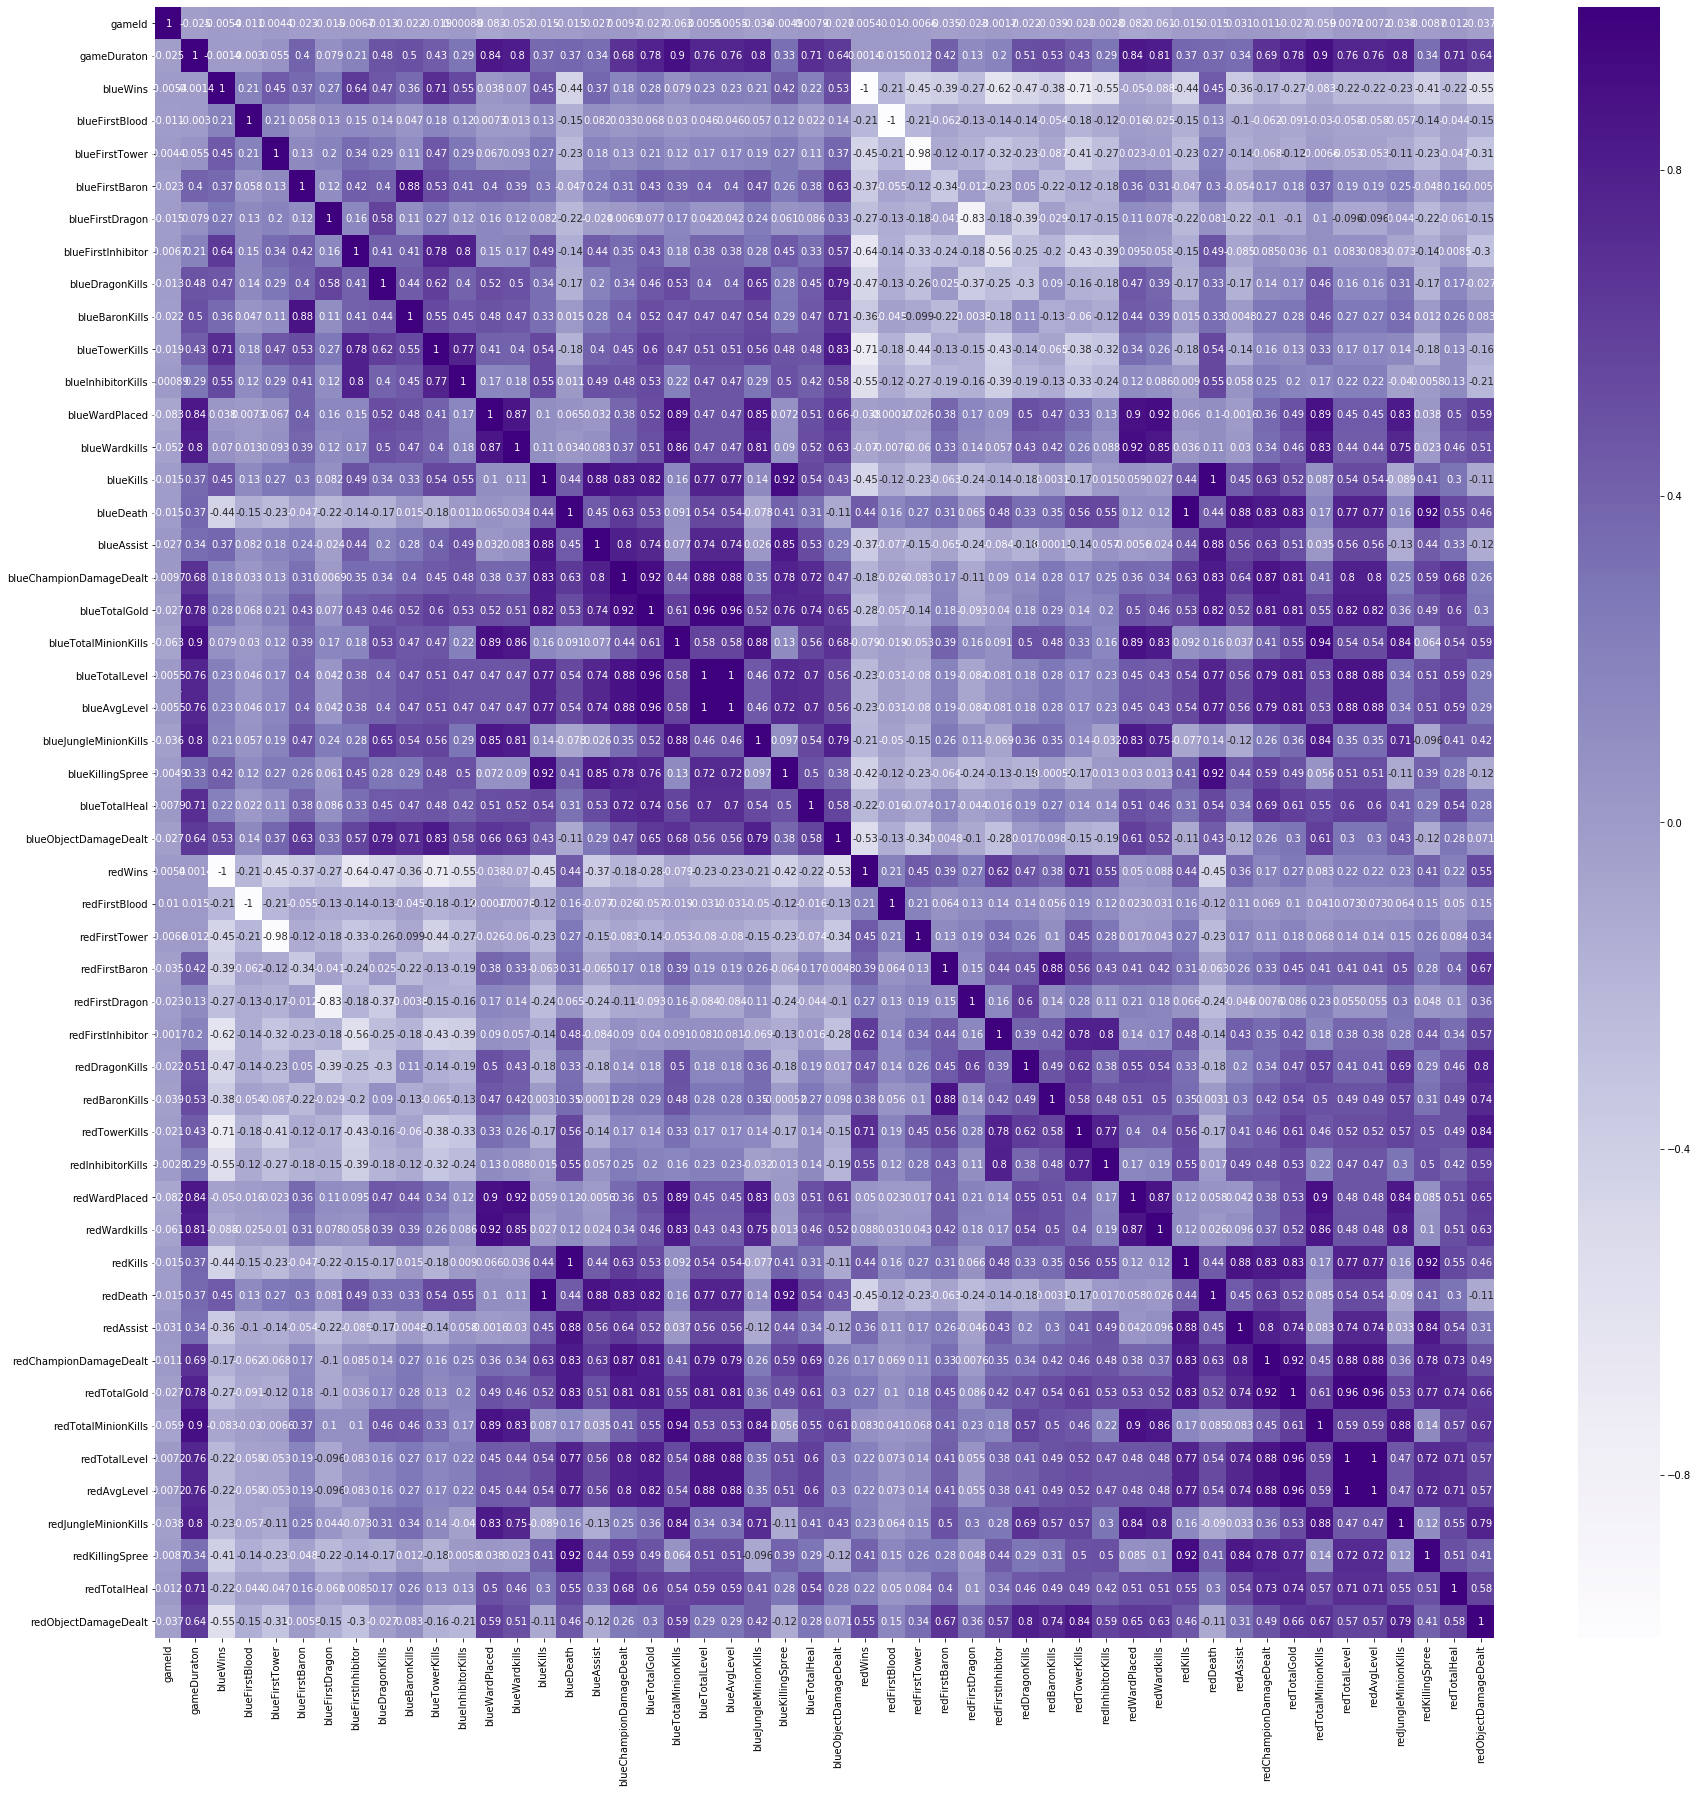

In [4]:
#Represented with heatmap:
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Purples)
plt.show()

In [5]:
#Irrelevant informations are GAME ID and GAME DURATION.
#Removing them with red wins because we have already blue wins. There are no tie in this game.
data_set = data_set.drop(['gameId','gameDuraton','redWins'],axis = 1)

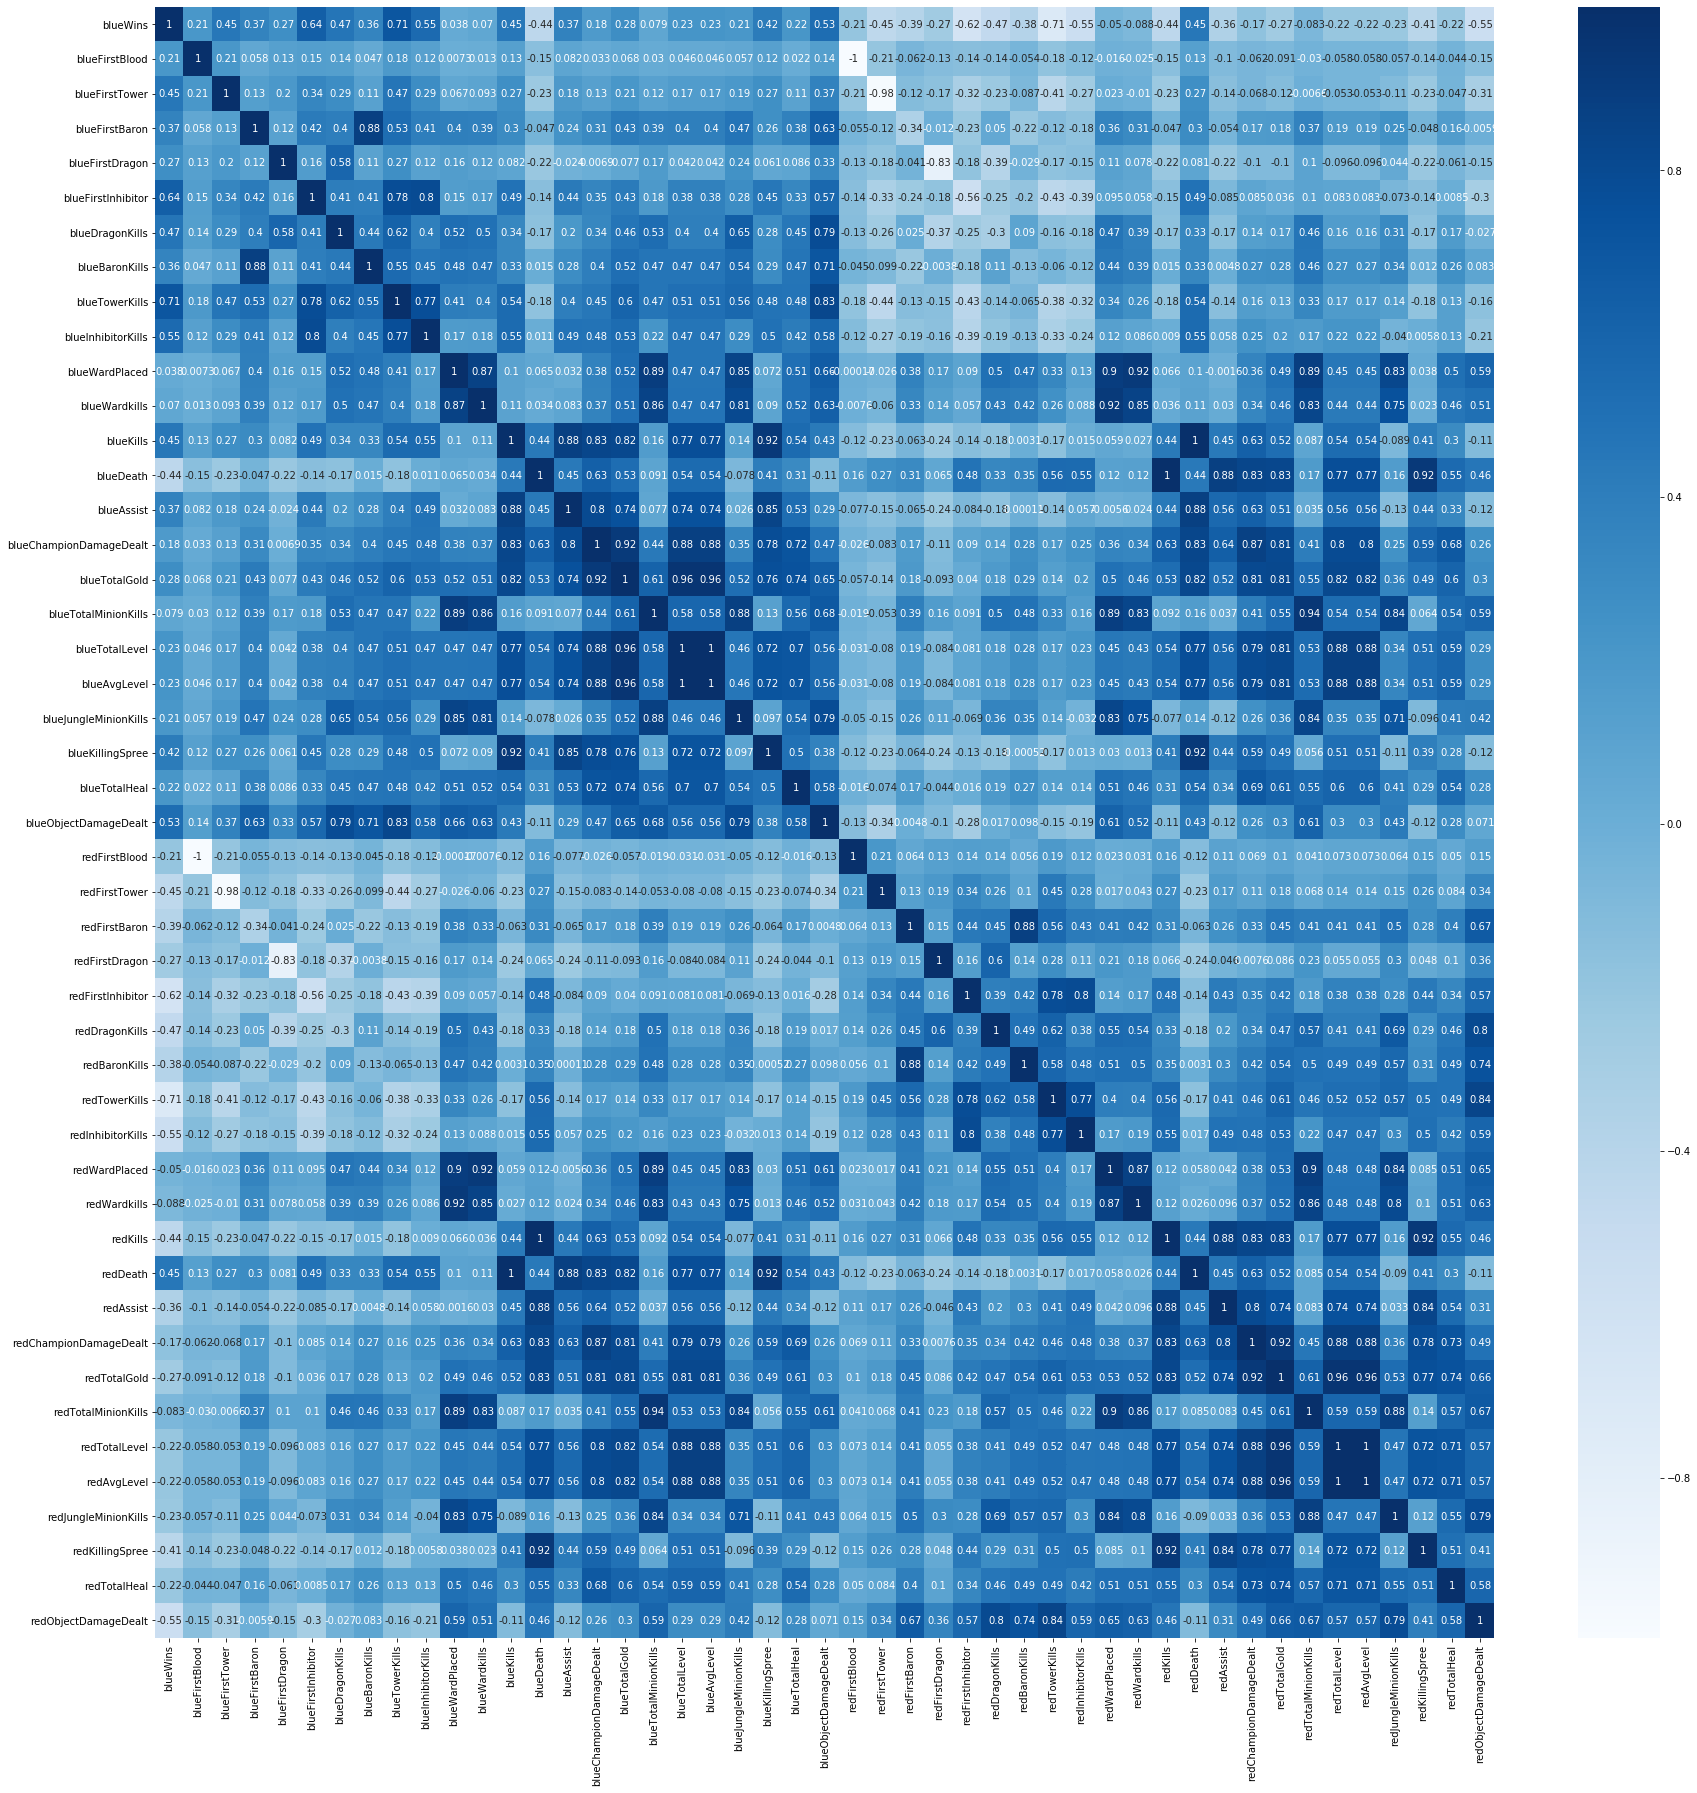

In [6]:
#Co-relation matrix revisited
plt.figure(figsize = (30,30))
sns.heatmap(data_set.corr(),annot = True,cmap = plt.cm.Blues)
plt.show()

# Exploratory Data Analysis

In [7]:
data_set

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,0,1,0,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1,0,0,0,1,0,2,0,4,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,0,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,0,0,0,1,1,0,1,1,2,0,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,1,1,1,1,1,1,2,2,11,3,...,83,131536,74596,794,85,17.0,227,7,86431,64141
5,1,1,1,0,0,1,2,0,8,1,...,34,64242,44280,555,61,12.2,140,3,23741,20132
6,0,0,1,0,0,0,0,0,2,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
7,1,1,1,1,0,1,2,1,10,2,...,30,62134,47408,608,63,12.6,133,5,27846,32107
8,1,1,1,1,0,1,3,1,8,1,...,34,69840,49906,646,69,13.8,159,6,32026,41601
9,1,0,1,0,1,0,1,0,4,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775


# Data Preprocessing

In [8]:
y = data_set.iloc[:,0].values #win class
x = data_set.iloc[:,1:].values #other attributes seperated

In [9]:
#Preparing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,stratify=y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
'''#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. 

from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt

# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(x):
	# split data
	X_train, X_test = x[train_ix, :], x[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 400, 1000]
	space['max_features'] = [4, 6, 10]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))'''

"#Double Cross Validation in order to find optimal n_estimators and max_features that results with useful accuracy. \n\nfrom sklearn.model_selection import KFold\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\n\n# manual nested cross-validation for random forest on a classification dataset\nfrom numpy import mean\nfrom numpy import std\nfrom sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\n# configure the cross-validation procedure\ncv_outer = KFold(n_splits=10, shuffle=True, random_state=1)\n# enumerate splits\nouter_results = list()\nfor train_ix, test_ix in cv_outer.split(x):\n\t# split data\n\tX_train, X_test = x[train_ix, :], x[test_ix, :]\n\ty_train, y_test = y[train_ix], y[test_ix]\n\t# configure the cross-validation procedure\n\tcv_inner = KFold(n_splits=3, shuffle=True, random_sta

# Modal Selection - XGboost Classifier

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

classifier = XGBClassifier(n_estimators = 100,learning_rate = 0.3)
classifier.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_test,y_test)])
y_pred = classifier.predict(x_test)

[0]	validation_0-error:0.02262	validation_1-error:0.02589
[1]	validation_0-error:0.01625	validation_1-error:0.02069
[2]	validation_0-error:0.01381	validation_1-error:0.01858
[3]	validation_0-error:0.01306	validation_1-error:0.01883
[4]	validation_0-error:0.01126	validation_1-error:0.01710
[5]	validation_0-error:0.01067	validation_1-error:0.01648
[6]	validation_0-error:0.01004	validation_1-error:0.01648
[7]	validation_0-error:0.00945	validation_1-error:0.01524
[8]	validation_0-error:0.00733	validation_1-error:0.01487
[9]	validation_0-error:0.00664	validation_1-error:0.01350
[10]	validation_0-error:0.00648	validation_1-error:0.01276
[11]	validation_0-error:0.00579	validation_1-error:0.01288
[12]	validation_0-error:0.00520	validation_1-error:0.01189
[13]	validation_0-error:0.00473	validation_1-error:0.01226
[14]	validation_0-error:0.00398	validation_1-error:0.01214
[15]	validation_0-error:0.00388	validation_1-error:0.01165
[16]	validation_0-error:0.00334	validation_1-error:0.01214
[17]	va

# Metrics #1-1

In [12]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm,"\n accuracy:",accuracy)

[[4004   31]
 [  44 3993]] 
 accuracy: 0.9907086223984143


# Modal Selection - Decision Tree Classifier

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=1000)
clf = clf.fit(x_train,y_train)
y_pred2 = clf.predict(x_test)

# Metrics #1-2

In [14]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[3812  223]
 [ 269 3768]] 
 accuracy: 0.9390485629335976


# Visualization of XGB Tree and Decision Tree 1

In [15]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(classifier)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('original-Challenger-XGB-1', format = format)

'original-Challenger-XGB-1.png'

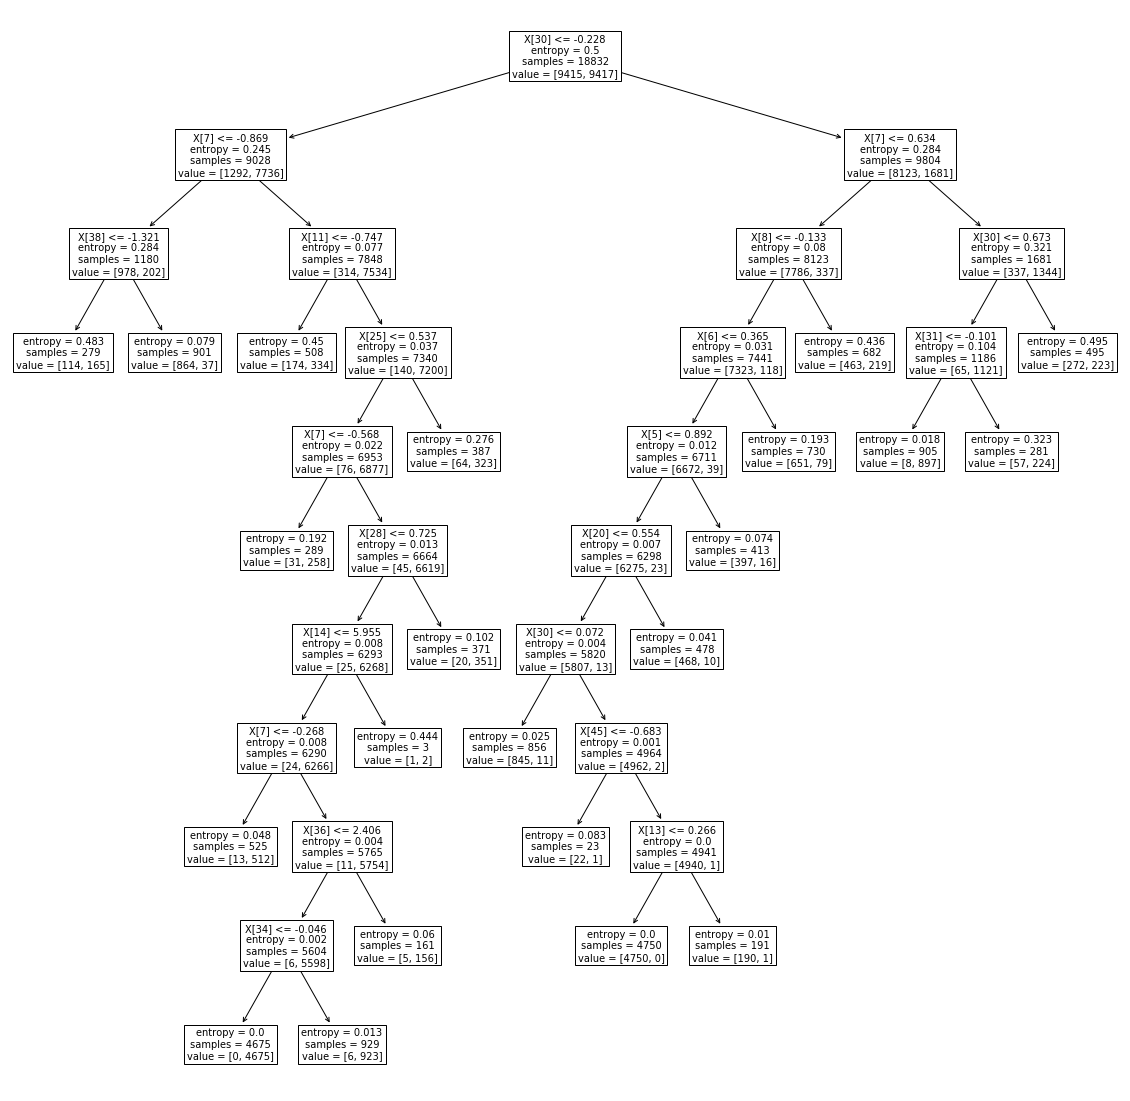

C:\Users\alper\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


'original-Challenger-Decision-1.png'

In [16]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="original-Challenger-Decision-1", format="png")

# Dimensionality Reduction by PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
reduction = pca.fit_transform(x_train)
reduction_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.36445136]


In [18]:
data_reduced = pd.DataFrame(data = reduction,columns = ['pc1'])
data_reduced

,pc1
0,-1.138866
1,5.958078
2,-1.337821
3,0.397529
4,-2.222597
5,-5.570264
6,2.004027
7,4.787312
8,0.500653
9,-2.321091


In [19]:
reduction_test

array([[ 6.87958346],
       [-5.29778909],
       [-5.49852869],
       ...,
       [-0.34576444],
       [-1.41561026],
       [-0.96007951]])

In [20]:
#Preparing PC1 to put in XGB again
x_reduced = data_reduced.iloc[:,:].values

# PCA XGB Tree

In [21]:
#Fitting XGB Classifier
from xgboost import XGBClassifier
reduced_class = XGBClassifier(n_estimators = 100,learning_rate = 0.3)
reduced_class.fit(x_reduced,y_train)
y_reduced_pred = reduced_class.predict(reduction_test)

# Metrics #2-1

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_reduced_pred)
accuracy = accuracy_score(y_test, y_reduced_pred)
print(cm,"\n accuracy:",accuracy)

[[2036 1999]
 [2031 2006]] 
 accuracy: 0.5007433102081269


# PCA Decision Tree

In [23]:
#Fitting Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(criterion = "gini", min_samples_split=1000)
clf2 = clf2.fit(x_reduced,y_train)
y_reduced_pred2 = clf2.predict(reduction_test)

In [24]:
cm2 = confusion_matrix(y_test, y_reduced_pred2)
accuracy2 = accuracy_score(y_test, y_reduced_pred2)
print(cm2,"\n accuracy:",accuracy2)

[[2213 1822]
 [2183 1854]] 
 accuracy: 0.5038404360753221


# Visualization of XGB Tree and Decision Tree 2

In [25]:
#XGB Tree as .png saved
import xgboost as xgb

format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(reduced_class)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('original-Challenger-XGB-2', format = format)

'original-Challenger-XGB-2.png'

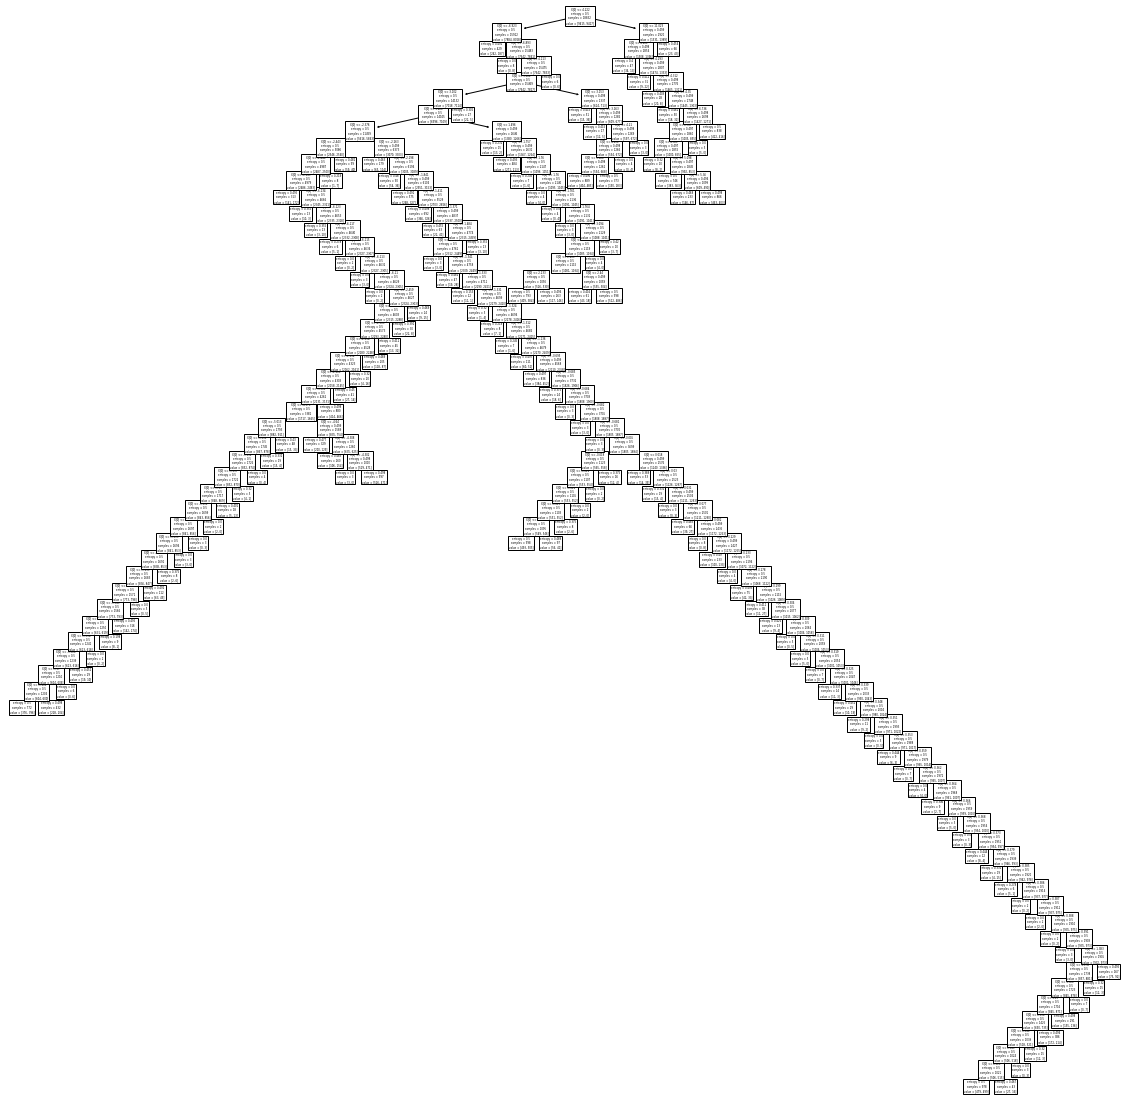

'original-Challenger-Decision-2.png'

In [26]:
#Decision Tree as you can see down below and saved as .png
tree_plot = plt.figure(figsize=(20,20))
tree.plot_tree(clf2)
plt.show()

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas as pd
import graphviz

dot_data = export_graphviz(clf2, out_file=None,filled=True, rounded=True, special_characters=True ,class_names=['0','1'])
graph = graphviz.Source(dot_data)

graph.render(filename="original-Challenger-Decision-2", format="png")